# TASK 4: Meteorological Data Analysis for three airports in New York

## B PRIYANKAA

### s224207694
### priyayj2016@gmail.com

# ABSTRACT:

The purpose of this task is to plot the monthly_average_windspeed of the three airports: LGA, EWR and JFK in order to understand their windspeeds in a better manner.

1. To convert temp, dewp column denotes the temperature and dew point recorded at that moment in degrees Fahrenheit to Celcius in all the 3 airports, precip denotes the precipitation in inches to millimetres recorded at that moment in all the 3 airports, visib denotes the visibility in miles to metres recorded at that moment in all the 3 airports, wind_speed and wind_gust denotes the wind speed and gust speed in metre per hour (mph) to metre per second (mps) recorded at that moment in all the 3 airports.

2. To compute daily average wind speeds for the LGA airports that has a total of 365 speed values for each day and group the data by year, month and day at the same time.

3. To present the daily mean wind speeds at LGA airport in a single plot using the plt() function.

4. To identify and print the 10 windiest days at LGA, airport in Newyork that has the dates and its corresponding daily average wind speed.

5. To compute the monthly average wind speeds for all the airports: LGA, EWR, JFK.

6. To draw the monthly mean wind speeds for the three airports on the same plot.

## INITIAL DATA PRE-PROCESSING:

In [1]:
# Importing all the libraries needed for the data analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, zipfile
import datetime
import matplotlib.dates as mdates

# The first step is to read the csv file:

orig_data = pd.read_csv("nycflights13_weather.csv.gz", comment = "#")

# comment = "#" is given in order to extract only data and avoid all the comments.

The dataset "nycflights13_weather.csv.gz" is stored on the variable name orig_data.

In [2]:
orig_data.columns # Gets the columns present in the dataset.

Index(['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour'],
      dtype='object')

**There are about 15 columns where:**

1. **origin** where it denotes the place of origin of the airport. Here it is LGA, EWR, JFK.

2. **year, month, day, hour** denotes the time of recording of the wind speed in all the 3 airports.

3. **temp** denotes the temperature recorded at that moment in degrees Fahrenheit in all the 3 airports.

4. **dewp** denotes the dewpoint recorded at that moment in degrees Fahrenheit in all the 3 airports.

5. **humid** denotes the relative humidity recorded at that moment in all the 3 airports.

6. **wind_dir** denotes the wind direction in degrees recorded at that moment in all the 3 airports.

7. **wind_speed** denotes the wind speed in metre per hour (mph) recorded at that moment in all the 3 airports.

8. **wind_gust** denotes the gust speed in metre per hour (mph) recorded at that moment in all the 3 airports.

9. **precip** denotes the precipitation in inches recorded at that moment in all the 3 airports.

10. **pressure** denotes the sea-level pressure in millibars recorded at that moment in all the 3 airports.

11. **visib** denotes the visibility in miles recorded at that moment in all the 3 airports.

12. **time_hour** – date and hour formatted as YYYY-mm-dd and HH:MM:SS.



In [3]:
orig_data.dtypes # helps to understand the datatype of each column in the dataset.

origin         object
year            int64
month           int64
day             int64
hour            int64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
time_hour      object
dtype: object

1. **origin**, **time_hour** contains the string values, so the datatype is object type.

2. **year, month, day, hour** contains the integer values, so the datatype is object type.

3. **temp, dewp, wind_dir, wind_speed, wind_gust, precip, pressure, visib, humid** contains the float values, so the datatype is object type.

In [4]:
orig_data.shape # Prints the shape of the dataset.

(26130, 15)

In [5]:
orig_data.head() # Prints the first 5 rows of the dataset.

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


#### Corrected the data that is shifted by 1 hour back to normal with the help of Timedelta function of pandas.

In [6]:
orig_data["time_hour"] = pd.to_datetime(orig_data["time_hour"]) - pd.Timedelta(hours = 1)

In [7]:
orig_data.head(5)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 00:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 01:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 02:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 03:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 04:00:00


In the initial data processing step, 

**A pandas has a Timedelta function where it is mentioned hours as 1, which means the time is shifted by 1 hour.**

This correction must be done due to a presence of bug in the dataset.

## STEP - 1:

**Purpose of Step - 1:**

To convert:

1. **temp, dewp** column denotes the temperature and dew point recorded at that moment **in degrees Fahrenheit to Celcius** in all the 3 airports.

2. **precip** denotes the precipitation **in inches to millimetres** recorded at that moment in all the 3 airports.

3.  **visib** denotes the visibility **in miles to metres** recorded at that moment in all the 3 airports.

4. **wind_speed and wind_gust** denotes the wind speed and gust speed **in metre per hour (mph) to metre per second (mps)** recorded at that moment in all the 3 airports.

In [8]:
orig_data["temp"] = (orig_data["temp"] - 32) * 5/9 #The temperature in degrees Fahrenheit to Celcius.

orig_data["dewp"] = (orig_data["dewp"] - 32) * 5/9 #The dewpoint in degrees Fahrenheit to Celcius.

orig_data["precip"] = orig_data["precip"] * 25.4 #The precipitation value in inches to millimetres.

orig_data["visib"] = orig_data["visib"] * 1609.34 #The visibility value in miles to metres.

orig_data["wind_speed"] = orig_data["wind_speed"] * 0.447 #This denotes the wind speed converted from mph to mps.

orig_data["wind_gust"] = orig_data["wind_gust"] * 0.447 # This denotes the gust speed converted from mph to mps.

In [9]:
orig_data.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.629588,5.327637,0.0,1013.9,16093.4,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.172784,7.103516,0.0,1013.0,16093.4,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658385,6.511557,0.0,1012.6,16093.4,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.172784,7.103516,0.0,1012.7,16093.4,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687183,7.695476,0.0,1012.8,16093.4,2013-01-01 04:00:00


### Conclusion of Step 1:

1. The temperature is converted from degrees Fahrenheit to Celcius.

2. The dewpoint is converted from degrees Fahrenheit to Celcius.

3. The precipitation value is converted from inches to millimetres.

4. The visibility value is converted from miles to metres.

5. The wind speed is converted from mph to mps and the gust speed is converted from mph to mps.

## STEP - 2:

**Purpose of Step - 2:**

To compute daily average wind speeds for the LGA airports that has a total of 365 speed values for each day and group the data by year, month and day at the same time. 

In [10]:
weather_at_lga = orig_data[orig_data['origin'] == 'LGA'] # To group the column values of "LGA" from the original dataset to a separate variable.

In [11]:
lga_dailymean_windspeed = weather_at_lga.groupby(["year", "month", "day"])["wind_speed"].mean().reset_index() # The data is grouped by year, month and day at the same time and mean is computed. 

In [12]:
lga_dailymean_windspeed['date'] = pd.to_datetime(lga_dailymean_windspeed[["year", "month", "day"]]) # Returns a pandas Datatime object value.

In [13]:
lga_dailymean_windspeed.set_index("date", inplace = True) # The index is set based on the date value.

### Conclusion of Step - 2:

The daily average wind speeds is computed for the LGA airports that has a total of 365 speed values for each day and group the data by year, month and day at the same time. 

 - To group the column values of "LGA" from the original dataset to a separate variable, "weather_at_lga".
 
 - The data is grouped by year, month and day at the same time and mean is computed. 
 
 - Returns a pandas Datatime object value.
 
 - The index is set based on the date value.


## STEP - 3:

**Purpose of Step  - 3:**

To present the daily mean wind speeds at LGA airport in a single plot using the plt() function.

Text(0, 0.5, 'daily average wind speed [m/s] at LGA')

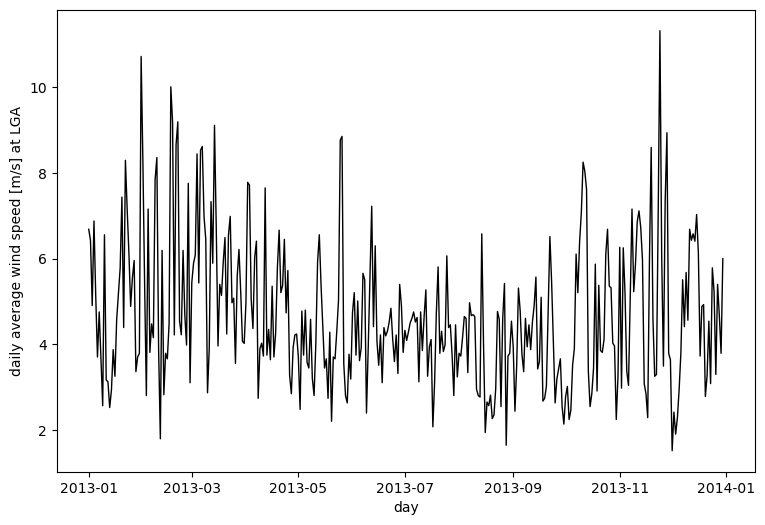

In [14]:
plt.figure(figsize = (9,6))
plt.plot(lga_dailymean_windspeed.index, lga_dailymean_windspeed.wind_speed, label = "Daily Average Wind Speed", linewidth = 1, color = 'black')
plt.xlabel('day')
plt.ylabel('daily average wind speed [m/s] at LGA')


### Conclusion of Step - 3:

1. "lga_dailymean_windspeed.index" has daily average wind speeds for the LGA airport and index is set by "date".

2. "lga_dailymean_windspeed.wind_speed" has daily average wind speeds for the LGA airport.

3. To set the xlabel that is "day" and ylabel that has "daily average wind speed [m/s] at LGA".

4. The plt() function is used to present the daily mean wind speeds at LGA airport in m/s.

### Observations:

1. Daily average wind speed [m/s] is high above 10 in between 2013-11 and 2014-01.

2. Daily average wind speed [m/s] is low below 2 in between 2013-11 and 2014-01.

## STEP - 4:

**Purpose of Step - 4:**

To identify and print the 10 windiest days at LGA, airport in Newyork that has the dates and its corresponding daily average wind speed.

In [15]:
top10_windiestdays_LGA = lga_dailymean_windspeed.nlargest(10, 'wind_speed') # To store the 10 windiest days from the average windspeed dataset in a separate variable "top10_windiestdays_LGA".

In [16]:
print("##                        wind_speed")
print("## date                                                   ")
print(f"## {top10_windiestdays_LGA.index[0].date()}        {(top10_windiestdays_LGA.wind_speed[0]):.6f}")
print(f"## {top10_windiestdays_LGA.index[1].date()}        {(top10_windiestdays_LGA.wind_speed[1]):.6f}")
print(f"## {top10_windiestdays_LGA.index[2].date()}        {(top10_windiestdays_LGA.wind_speed[2]):.6f}")
print(f"## {top10_windiestdays_LGA.index[3].date()}        {(top10_windiestdays_LGA.wind_speed[3]):.6f}")
print(f"## {top10_windiestdays_LGA.index[4].date()}        {(top10_windiestdays_LGA.wind_speed[4]):.6f}")
print(f"## {top10_windiestdays_LGA.index[5].date()}        {(top10_windiestdays_LGA.wind_speed[5]):.6f}")
print(f"## {top10_windiestdays_LGA.index[6].date()}        {(top10_windiestdays_LGA.wind_speed[6]):.6f}")
print(f"## {top10_windiestdays_LGA.index[7].date()}        {(top10_windiestdays_LGA.wind_speed[7]):.6f}")
print(f"## {top10_windiestdays_LGA.index[8].date()}        {(top10_windiestdays_LGA.wind_speed[8]):.6f}")
print(f"## {top10_windiestdays_LGA.index[9].date()}        {(top10_windiestdays_LGA.wind_speed[9]):.6f}")

##                        wind_speed
## date                                                   
## 2013-11-24        11.316771
## 2013-01-31        10.716639
## 2013-02-17        10.009341
## 2013-02-21        9.192080
## 2013-02-18        9.173443
## 2013-03-14        9.109143
## 2013-11-28        8.937677
## 2013-05-26        8.851944
## 2013-05-25        8.766210
## 2013-02-20        8.659044


### Conclusion of Step - 4:

1. The 10 windiest days at LGA, airport in Newyork that has the dates and its corresponding daily average wind speed is printed.

2. The windiest days with dates and respective wind speeds are: 11-24, 01-31, 02-17, 02-21, 02-18, 03-14, 11-28, 05-26, 05-25, 02-20; 11.316771, 10.716639, 10.009341, 9.192080, 9.173443, 8.937677,  8.851944, 8.766210, 8.659044 of the year 2013. 

## STEP - 5:

**Purpose of Step - 5:**

To compute the monthly average wind speeds for all the airports: LGA, EWR, JFK.

In [17]:
index_outlier = orig_data['wind_speed'].idxmax() # Returns a maximum value for each column.

In [18]:
orig_data.at[index_outlier, 'wind_speed'] = np.nan # Returns a maximum value for each column for each missing values (Np.nan).

### The monthly windspeed is stored in a respective variable for the airports like LGA, EWR, JFK.

In [19]:
monthly_windspeed_LGA = orig_data[orig_data['origin'] == 'LGA'].copy()
monthly_windspeed_LGA_date = monthly_windspeed_LGA.groupby(["year", "month"])
monthly_average_windspeed_LGA = monthly_windspeed_LGA_date.wind_speed.mean()

monthly_average_windspeed_LGA = pd.DataFrame(monthly_average_windspeed_LGA)


monthly_average_windspeed_LGA["date"] = pd.to_datetime(monthly_average_windspeed_LGA.index.map(lambda x: f"{x[0]}-{x[1]}-01"))
monthly_average_windspeed_LGA.set_index("date", inplace = True)

1. A copy of the column of "LGA" airport data from the original dataset is stored at monthly_windspeed_LGA.

2. The monthly average windspeed is found for the "LGA" airport data from the original dataset by first grouping the data by year and month and then using the mean() function.

3. In the monthly average windspeed, the date is set by index into a variable variable "monthly_average_windspeed_LGA".

In [20]:
monthly_windspeed_EWR = orig_data[orig_data['origin'] == 'EWR'].copy()
monthly_windspeed_EWR_date = monthly_windspeed_EWR.groupby(["year", "month"])
monthly_average_windspeed_EWR = monthly_windspeed_EWR_date.wind_speed.mean()

monthly_average_windspeed_EWR = pd.DataFrame(monthly_average_windspeed_EWR)


monthly_average_windspeed_EWR["date"] = pd.to_datetime(monthly_average_windspeed_EWR.index.map(lambda x: f"{x[0]}-{x[1]}-01"))
monthly_average_windspeed_EWR.set_index("date", inplace = True)

1. A copy of the column of "EWR" airport data from the original dataset is stored at monthly_windspeed_EWR.

2. The monthly average windspeed is found for the "EWR" airport data from the original dataset by first grouping the data by year and month and then using the mean() function.

3. In the monthly average windspeed, the date is set by index into a variable variable "monthly_average_windspeed_EWR".

In [21]:
monthly_windspeed_JFK = orig_data[orig_data['origin'] == 'JFK'].copy()
monthly_windspeed_JFK_date = monthly_windspeed_JFK.groupby(["year", "month"])
monthly_average_windspeed_JFK = monthly_windspeed_JFK_date.wind_speed.mean()

monthly_average_windspeed_JFK = pd.DataFrame(monthly_average_windspeed_JFK)


monthly_average_windspeed_JFK["date"] = pd.to_datetime(monthly_average_windspeed_JFK.index.map(lambda x: f"{x[0]}-{x[1]}-01"))
monthly_average_windspeed_JFK.set_index("date", inplace = True)

1. A copy of the column of "JFK" airport data from the original dataset is stored at monthly_windspeed_JFK.

2. The monthly average windspeed is found for the "JFK" airport data from the original dataset by first grouping the data by year and month and then using the mean() function.

3. In the monthly average windspeed, the date is set by index into a variable variable "monthly_average_windspeed_JFK".

### Conclusion of Step - 5:

1. A copy of the columns of "LGA", "EWR", "JFK" airport data from the original dataset is stored at monthly_windspeed_LGA, monthly_windspeed_EWR, monthly_windspeed_JFK respectively.

2. The monthly average windspeed is found for the "LGA", "EWR", "JFK" airports data from the original dataset by first grouping the data by year and month and then using the mean() function.

3. In the monthly average windspeed is found for the "LGA", "EWR", "JFK", the date is set by index into a variable variable monthly_average_windspeed_LGA, monthly_windspeed_EWR, monthly_windspeed_JFK respectively.

## STEP - 6:

To draw the monthly mean wind speeds for the three airports on the same plot.

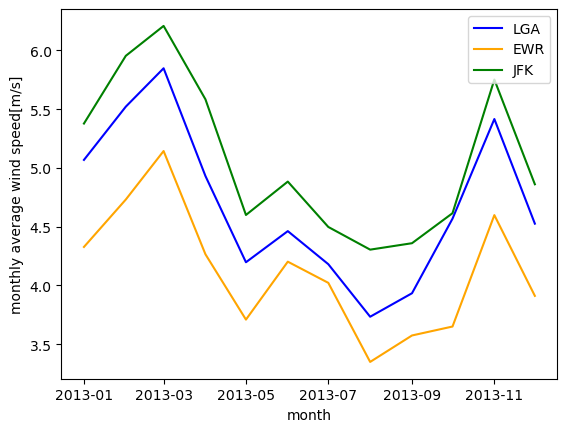

In [22]:
plt.plot(monthly_average_windspeed_LGA, label = 'LGA', color = 'blue')
plt.plot(monthly_average_windspeed_EWR, label = 'EWR', color = 'orange')
plt.plot(monthly_average_windspeed_JFK, label = 'JFK', color = 'green')

plt.xlabel('month')
plt.ylabel('monthly average wind speed[m/s]')


plt.legend(['LGA', 'EWR', 'JFK'], loc = "upper right")
plt.show()

### Conclusion of Step - 6:

1. The monthly average windspeed is calculated from the original dataset and the date is set by index into a variable variable **"monthly_average_windspeed_LGA"**. It is plotted as **"blue line"** on the graph using the plt() function.

2.  The monthly average windspeed is calculated from the original dataset and the date is set by index into a variable variable **"monthly_average_windspeed_EWR"**. It is plotted as **"orange line"** on the graph using the plt() function.

3.  The monthly average windspeed is calculated from the original dataset and the date is set by index into a variable variable **"monthly_average_windspeed_JFK"**. It is plotted as **"green line"** on the graph using the plt() function.

### Observations:

1. The monthly_average_windspeed_LGA has reached a maximum value of 5.8 and a minimum value of 3.7.

2. The monthly_average_windspeed_EWR has reached a maximum value of 5.1 and a minimum value of 3.4.

3. The monthly_average_windspeed_EWR has reached a maximum value of 6.2 and a minimum value of 4.2.

## SUMMARY:

The purpose of this task is to plot the monthly_average_windspeed of the three airports: LGA, EWR and JFK in order to understand their windspeeds in a better manner.

1. The temperature is converted from degrees Fahrenheit to Celcius, the dewpoint is converted from degrees Fahrenheit to Celcius, the precipitation value is converted from inches to millimetres, the visibility value is converted from miles to metres and the wind speed is converted from mph to mps and the gust speed is converted from mph to mps.

2. The daily average wind speeds is computed for the LGA airports that has a total of 365 speed values for each day and group the data by year, month and day at the same time.

3. The plt() function is used to present the daily mean wind speeds at LGA airport in m/s.

4. The 10 windiest days at LGA, airport in Newyork that has the dates and its corresponding daily average wind speed is calculated. The windiest days with dates and respective wind speeds are: 11-24, 01-31, 02-17, 02-21, 02-18, 03-14, 11-28, 05-26, 05-25, 02-20; 11.316771, 10.716639, 10.009341, 9.192080, 9.173443, 8.937677, 8.851944, 8.766210, 8.659044 of the year 2013.

5. In the monthly average windspeed is calculated for the "LGA", "EWR", "JFK", the date is set by index into a variable variable monthly_average_windspeed_LGA, monthly_windspeed_EWR, monthly_windspeed_JFK respectively.

6. The monthly average windspeed for all the 3 airports is plotted using the plt() function.

## REFERENCE:

Marek Gagolewski, Minimalist Data Wrangling with Python (2022).